In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def rs_padding(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    # 
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    
    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    
    img = cv2.copyMakeBorder(img, 0, dh, 0, 0, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)

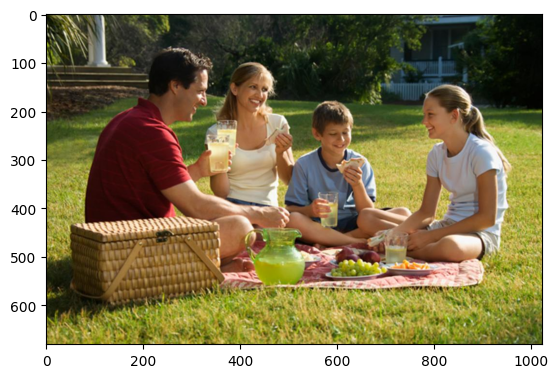

In [11]:
img = cv2.imread('../image.jpg')[:,:,::-1]
plt.imshow(img)

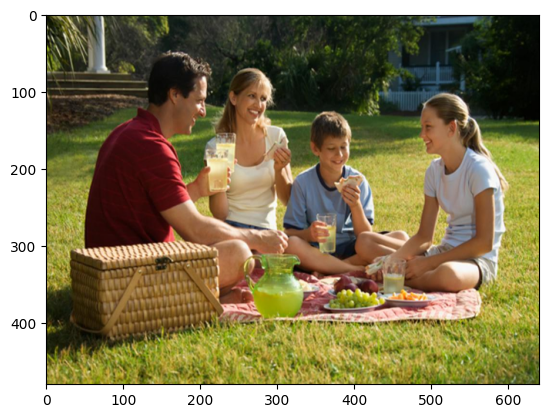

In [12]:
img_resize = cv2.resize(img, (640, 480))
plt.imshow(img_resize)

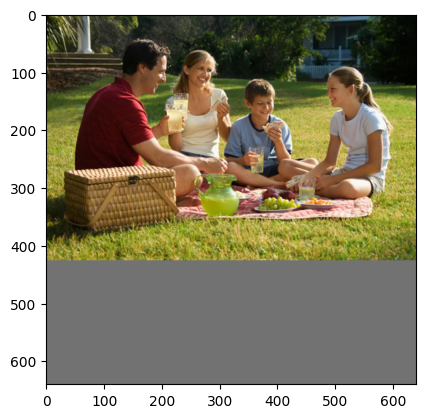

In [15]:
img2 = rs_padding(img)[0]
plt.imshow(img2)